# **Diagnostic and Predictive Analysis of Diabetes Complications**

## Perform Exploratory Data Analysis on the data set
###  **I** - **Data Assessment**
In this stage we display the data we're going to import to assess its Quality and Tidiness.

**Quality dimensions or aspects are mainly:**

**1.** **Completeness** - Checking if there are any missing records

**2.** **Validity**  Checking if the values displayed are 'valid' i.e data that follow certain known rules

**3.** **Accuracy** - A significant decrease or increase in a value is considered an 'inaccurate data'

**4.** **Consistency** - There should be only one way to represent or refer to a value otherwise the data is called to be 'inconsistent'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
diabetes_data = pd.read_csv('DM_registry_Khorramabad.csv',encoding='latin-1')
diabetes_data.shape
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  133 non-null    float64
 1   Sex                   133 non-null    object 
 2   DM type               133 non-null    object 
 3   DM treat              133 non-null    object 
 4   Statin                133 non-null    object 
 5   Dose ( Í2 if BID)     133 non-null    object 
 6   Age                   133 non-null    float64
 7   BMI                   133 non-null    float64
 8   DM duration           133 non-null    float64
 9   FBS                   133 non-null    float64
 10  A1C                   133 non-null    float64
 11  LDL                   133 non-null    float64
 12  HDL                   133 non-null    float64
 13  TG                    133 non-null    float64
 14  Sys BP                133 non-null    float64
 15  Dias BP               1

Display first 5 observations.

In [ ]:
diabetes_data.head(5)

,Name,Sex,DM type,DM treat,Statin,Dose ( Í2 if BID),Age,BMI,DM duration,FBS,A1C,LDL,HDL,TG,Sys BP,Dias BP,Neu-pathy,Neph-pathy,Ret-pathy,PVD,CDV,Ft ulcer,Dawn ef,Unnamed: 23,Cum Atorvastatin Equ,Unnamed: 25,Real LDL,Male
0,1.0,Male,II,Oral,Ator,40,65.0,25.0,20.0,129.0,7.1,100.0,40.0,200.0,130.0,80.0,Yes,Yes,Yes,Yes,Yes,No,Yes,NaN,40,NaN,148.00,NaN
1,2.0,Male,II,Oral,Ator,20,42.0,27.0,3.0,210.0,8.9,125.0,38.0,151.0,140.0,90.0,No,No,No,No,No,No,No,NaN,20,NaN,171.25,I
2,3.0,Female,I,Ins,No statin,No,31.0,21.0,11.0,164.0,7.7,147.0,35.0,217.0,145.0,80.0,No,No,Yes,No,No,No,Yes,NaN,FALSE,NaN,147.00,II
3,4.0,Male,II,Ins,Ator,80,70.0,32.0,29.0,208.0,9.3,119.0,36.0,168.0,160.0,100.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,NaN,80,NaN,184.45,NaN
4,5.0,Female,II,Oral,Ator,40,54.0,34.0,6.0,183.0,9.8,196.0,32.0,197.0,155.0,95.0,Yes,Yes,No,No,No,No,No,NaN,40,NaN,290.08,Simv


***Note that :*** Columns Unnamed 23 and Unnamed 25 are blank and must be dropped.

Display last 5 observations.

In [ ]:
diabetes_data.tail(5)

,Name,Sex,DM type,DM treat,Statin,Dose ( Í2 if BID),Age,BMI,DM duration,FBS,A1C,LDL,HDL,TG,Sys BP,Dias BP,Neu-pathy,Neph-pathy,Ret-pathy,PVD,CDV,Ft ulcer,Dawn ef,Unnamed: 23,Cum Atorvastatin Equ,Unnamed: 25,Real LDL,Male
206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FALSE,NaN,0.0,NaN
207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FALSE,NaN,0.0,NaN
208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FALSE,NaN,0.0,NaN
209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FALSE,NaN,0.0,NaN
210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FALSE,NaN,0.0,NaN


***Note that :*** The observations are not right i.e., must drop the blank rows.

Summarize data

In [ ]:
diabetes_data.describe()

,Name,Age,BMI,DM duration,FBS,A1C,LDL,HDL,TG,Sys BP,Dias BP,Unnamed: 23,Unnamed: 25,Real LDL
count,133.00000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,0.0,0.0,211.000000
mean,67.00000,54.345865,29.133835,10.279699,208.902256,10.607970,134.052632,37.082707,212.030075,144.060150,90.330827,NaN,NaN,109.993507
std,38.53786,12.542078,4.973671,6.852690,68.766829,10.858141,44.411355,7.047507,99.071671,18.891139,13.820122,NaN,NaN,98.590675
min,1.00000,16.000000,18.000000,0.000000,80.000000,6.500000,36.000000,20.000000,74.000000,105.000000,60.000000,NaN,NaN,0.000000
25%,34.00000,45.000000,27.000000,4.000000,159.000000,8.000000,107.000000,32.000000,150.000000,130.000000,80.000000,NaN,NaN,0.000000
50%,67.00000,55.000000,30.000000,10.000000,200.000000,9.400000,139.000000,38.000000,196.000000,150.000000,90.000000,NaN,NaN,113.000000
75%,100.00000,64.000000,33.000000,15.000000,257.000000,11.100000,162.000000,41.000000,236.000000,160.000000,100.000000,NaN,NaN,190.920000
max,133.00000,79.000000,41.000000,30.000000,510.000000,133.000000,267.000000,62.000000,756.000000,180.000000,120.000000,NaN,NaN,341.880000


In [ ]:
list(diabetes_data.columns)

['Name',
 'Sex',
 'DM type',
 'DM treat',
 'Statin ',
 'Dose ( Í2 if BID)',
 'Age',
 'BMI',
 'DM duration',
 'FBS',
 'A1C',
 'LDL',
 'HDL',
 'TG',
 'Sys BP',
 'Dias BP',
 'Neu-pathy',
 'Neph-pathy',
 'Ret-pathy',
 'PVD',
 'CDV',
 'Ft ulcer',
 'Dawn ef',
 'Unnamed: 23',
 'Cum Atorvastatin Equ',
 'Unnamed: 25',
 'Real LDL',
 'Male']

### **II** - **Cleaning**
#####**1.** Check for missing data using counts() function
#####**2.** Rename columns having spaces in their names
#####**3.** Drop columns 24 and 26 as they are blank/empty.
#####**4.** Drop columns that are not necessary in our analysis.
#####**5.** Recode categorical values e.g., Yes -> 1 and No -> 0 .


We will drop columns Unnamed : 23, Unnanmed : 25 as they are empty columns. Also drop column Male since it is not necessary.

In [ ]:
# Drop blank columns 25
# Drop last column as it is not required
# Indexing starts from 0 hence i-1
diabetes_data.drop(diabetes_data.columns[25], axis=1, inplace=True)
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  133 non-null    float64
 1   Sex                   133 non-null    object 
 2   DM type               133 non-null    object 
 3   DM treat              133 non-null    object 
 4   Statin                133 non-null    object 
 5   Dose ( Í2 if BID)     133 non-null    object 
 6   Age                   133 non-null    float64
 7   BMI                   133 non-null    float64
 8   DM duration           133 non-null    float64
 9   FBS                   133 non-null    float64
 10  A1C                   133 non-null    float64
 11  LDL                   133 non-null    float64
 12  HDL                   133 non-null    float64
 13  TG                    133 non-null    float64
 14  Sys BP                133 non-null    float64
 15  Dias BP               1

In [ ]:
# Drop blank columns 23
diabetes_data.drop(diabetes_data.columns[23], axis=1, inplace = True)
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  133 non-null    float64
 1   Sex                   133 non-null    object 
 2   DM type               133 non-null    object 
 3   DM treat              133 non-null    object 
 4   Statin                133 non-null    object 
 5   Dose ( Í2 if BID)     133 non-null    object 
 6   Age                   133 non-null    float64
 7   BMI                   133 non-null    float64
 8   DM duration           133 non-null    float64
 9   FBS                   133 non-null    float64
 10  A1C                   133 non-null    float64
 11  LDL                   133 non-null    float64
 12  HDL                   133 non-null    float64
 13  TG                    133 non-null    float64
 14  Sys BP                133 non-null    float64
 15  Dias BP               1

In [ ]:
# Drop unnecessary column Male
diabetes_data.drop(['Male'], axis=1, inplace = True)
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  133 non-null    float64
 1   Sex                   133 non-null    object 
 2   DM type               133 non-null    object 
 3   DM treat              133 non-null    object 
 4   Statin                133 non-null    object 
 5   Dose ( Í2 if BID)     133 non-null    object 
 6   Age                   133 non-null    float64
 7   BMI                   133 non-null    float64
 8   DM duration           133 non-null    float64
 9   FBS                   133 non-null    float64
 10  A1C                   133 non-null    float64
 11  LDL                   133 non-null    float64
 12  HDL                   133 non-null    float64
 13  TG                    133 non-null    float64
 14  Sys BP                133 non-null    float64
 15  Dias BP               1

Since, we will only model Neuropathy, Nephropathy and Retinopathy based on the predictors :

1. Age

2. Body Mass Index (BMI)
 
3. Diabetes Mellitus duration (DM_duration)

4. Fasting Blood Sugar (FBS)

5. Glycated Haemoglobin (A1C)

6. Low-density Lipoprotein (LDL)

7. High-density Lipoprotein (HDL)

8. Triglyceride (TG)

9. Systolic Blood Pressure (Sys_BP)

10. Diastolic Blood Pressure (Dias_BP),

we will drop the rest of the columns which are :

1. Name
2. Sex
3. DM_type
4. DM_treat
5. Statin
6. Dose ( Í2 if BID)
7. Dawn_ef
8. Cum Atorvastatin Equ
9. Real LDL
10. PVD
11. CDV
12. Ft ulcer


In [ ]:
# Drop unnecessary columns
diabetes_data.drop(['Name', 'Sex', 'DM type', 'DM treat', 'Statin ', 'Dose ( Í2 if BID)', 'Dawn ef', 'Cum Atorvastatin Equ', 'Real LDL', 'PVD', 'CDV', 'Ft ulcer'], axis=1, inplace = True)
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          133 non-null    float64
 1   BMI          133 non-null    float64
 2   DM duration  133 non-null    float64
 3   FBS          133 non-null    float64
 4   A1C          133 non-null    float64
 5   LDL          133 non-null    float64
 6   HDL          133 non-null    float64
 7   TG           133 non-null    float64
 8   Sys BP       133 non-null    float64
 9   Dias BP      133 non-null    float64
 10  Neu-pathy    133 non-null    object 
 11  Neph-pathy   133 non-null    object 
 12  Ret-pathy    133 non-null    object 
dtypes: float64(10), object(3)
memory usage: 21.6+ KB


After dropping empty columns we will check if any more empty cells are still present.

In [ ]:
# Count total NaN at each column in a DataFrame
print(" \nCount total NaN at each column in a DataFrame : \n\n", diabetes_data.isnull().sum())

 
Count total NaN at each column in a DataFrame : 

 Age            78
BMI            78
DM duration    78
FBS            78
A1C            78
LDL            78
HDL            78
TG             78
Sys BP         78
Dias BP        78
Neu-pathy      78
Neph-pathy     78
Ret-pathy      78
dtype: int64


We need to delete 78 blank rows from each column. 

In [ ]:
# Drop empty rows
diabetes_data.dropna(inplace=True)
# Verify
diabetes_data.isnull().sum()

Age            0
BMI            0
DM duration    0
FBS            0
A1C            0
LDL            0
HDL            0
TG             0
Sys BP         0
Dias BP        0
Neu-pathy      0
Neph-pathy     0
Ret-pathy      0
dtype: int64

Recall the last 5 rows displayed had all null values. So let's check again.

In [ ]:
diabetes_data.tail(5)

,Age,BMI,DM duration,FBS,A1C,LDL,HDL,TG,Sys BP,Dias BP,Neu-pathy,Neph-pathy,Ret-pathy
128,52.0,34.5,3.0,138.0,7.33,113.0,33.0,217.0,115.0,75.0,Yes,No,No
129,56.0,22.0,3.0,156.0,7.16,80.0,43.0,179.0,130.0,90.0,No,No,No
130,65.0,24.0,3.0,300.0,9.67,58.0,20.0,96.0,120.0,80.0,Yes,Yes,Yes
131,56.0,33.0,5.0,213.0,8.74,107.0,34.0,756.0,155.0,110.0,Yes,Yes,Yes
132,48.0,31.0,2.0,159.0,7.45,141.0,39.0,197.0,120.0,80.0,No,No,No


No more null values present!!

In [ ]:
# Age column
diabetes_data.Age.value_counts()

61.0    8
68.0    7
70.0    6
59.0    6
52.0    5
64.0    5
43.0    5
49.0    5
39.0    4
45.0    4
66.0    4
65.0    4
56.0    4
44.0    4
63.0    4
54.0    4
55.0    4
50.0    3
51.0    3
58.0    3
46.0    3
48.0    3
57.0    3
69.0    3
60.0    2
53.0    2
37.0    2
78.0    2
79.0    2
33.0    2
35.0    2
41.0    2
38.0    2
76.0    1
27.0    1
47.0    1
23.0    1
36.0    1
67.0    1
16.0    1
19.0    1
73.0    1
31.0    1
42.0    1
Name: Age, dtype: int64

In [ ]:
# BMI column
diabetes_data.BMI.value_counts()

31.0    14
30.0    12
28.0    12
27.0    10
29.0    10
33.0    10
34.0     9
20.0     5
32.0     5
35.0     5
25.0     5
26.0     4
36.0     3
23.0     3
24.0     3
19.0     3
39.0     2
22.0     2
38.0     2
18.0     2
37.0     2
30.5     1
23.5     1
19.5     1
41.0     1
27.3     1
21.5     1
34.5     1
21.0     1
33.7     1
18.3     1
Name: BMI, dtype: int64

In [ ]:
# DM duration column
# Remove spave from column name
diabetes_data.rename(columns={'DM duration':'DM_duration'}, inplace = True)
diabetes_data.DM_duration.value_counts()

3.0     13
10.0     9
7.0      8
8.0      8
13.0     7
4.0      7
2.0      7
15.0     7
5.0      7
20.0     6
14.0     6
11.0     5
1.0      5
9.0      5
17.0     5
18.0     5
12.0     4
19.0     3
6.0      3
22.0     2
0.0      2
21.0     2
26.0     1
23.0     1
30.0     1
29.0     1
16.0     1
28.0     1
0.2      1
Name: DM_duration, dtype: int64

In [ ]:
# FBS column
diabetes_data.FBS.value_counts()

280.0    5
198.0    4
159.0    3
163.0    3
154.0    3
        ..
245.0    1
510.0    1
140.0    1
214.0    1
129.0    1
Name: FBS, Length: 91, dtype: int64

In [ ]:
# A1C column
diabetes_data.A1C.value_counts()

8.00     7
7.80     6
13.00    6
10.80    5
10.00    5
        ..
13.20    1
13.10    1
7.83     1
10.40    1
10.90    1
Name: A1C, Length: 75, dtype: int64

In [ ]:
# LDL column
diabetes_data.LDL.value_counts()

141.0    4
161.0    4
139.0    4
131.0    4
130.0    4
        ..
71.0     1
231.0    1
267.0    1
208.0    1
182.0    1
Name: LDL, Length: 86, dtype: int64

In [ ]:
# HDL column
diabetes_data.HDL.value_counts()

40.0    15
38.0    12
37.0     9
41.0     8
35.0     7
31.0     7
30.0     7
39.0     7
32.0     6
33.0     5
29.0     5
43.0     5
42.0     4
36.0     4
34.0     4
47.0     4
46.0     3
45.0     3
28.0     3
48.0     2
22.0     2
21.0     1
25.0     1
24.0     1
44.0     1
62.0     1
60.0     1
59.0     1
26.0     1
52.0     1
27.0     1
20.0     1
Name: HDL, dtype: int64

In [ ]:
# TG column
diabetes_data.TG.value_counts()

217.0    4
197.0    4
200.0    3
198.0    2
179.0    2
        ..
363.0    1
208.0    1
176.0    1
233.0    1
210.0    1
Name: TG, Length: 96, dtype: int64

In [ ]:
# Neu-pathy column
# Remove hiphen from column name
diabetes_data.rename(columns={'Neu-pathy':'Neu_pathy'}, inplace = True)
# Replace 'No' to 0 and 'Yes' to 1
diabetes_data.replace(to_replace=['No','Yes '],value = [0,1],inplace = True)
# Change the format of 'Neu_pathy' to category.
diabetes_data['Neu_pathy'] = diabetes_data['Neu_pathy'].astype('int')
diabetes_data.Neu_pathy.value_counts()

1    75
0    58
Name: Neu_pathy, dtype: int64

In [ ]:
# Neph-pathy column
# Remove hiphen from column name
diabetes_data.rename(columns={'Neph-pathy':'Neph_pathy'}, inplace = True)
diabetes_data.Neph_pathy.value_counts()


1    73
0    60
Name: Neph_pathy, dtype: int64

In [ ]:
# Ret-pathy column
# Remove hiphen from column name
diabetes_data.rename(columns={'Ret-pathy':'Ret_pathy'}, inplace = True)
diabetes_data.Ret_pathy.value_counts()

0    91
1    42
Name: Ret_pathy, dtype: int64

In [ ]:
# Sys BP column
# Remove spave from column name
diabetes_data.rename(columns={'Sys BP':'Sys_BP'}, inplace = True)
diabetes_data.Sys_BP.value_counts()

160.0    27
120.0    16
140.0    15
130.0    13
150.0    12
165.0    11
110.0     9
155.0     9
170.0     7
145.0     5
115.0     2
125.0     2
180.0     2
135.0     2
105.0     1
Name: Sys_BP, dtype: int64

In [ ]:
# Dias BP column
# Remove spave from column name
diabetes_data.rename(columns={'Dias BP':'Dias_BP'}, inplace = True)
diabetes_data.Dias_BP.value_counts()

80.0     34
90.0     27
100.0    22
110.0    16
70.0     11
120.0     6
95.0      6
85.0      5
60.0      3
75.0      2
89.0      1
Name: Dias_BP, dtype: int64

### **II** - **Analysis**
#####**1.** Plot Pearson's correlation heatmap 
#####**2.** The correlation coefficient has values between -1 to 1
  — A value closer to 0 implies weaker correlation (exact 0 implying no correlation)

  — A value closer to 1 implies stronger positive correlation

  — A value closer to -1 implies stronger negative correlation
#####**3.** We will only select features which has correlation of above **0.50** (taking absolute value) with the output variable.


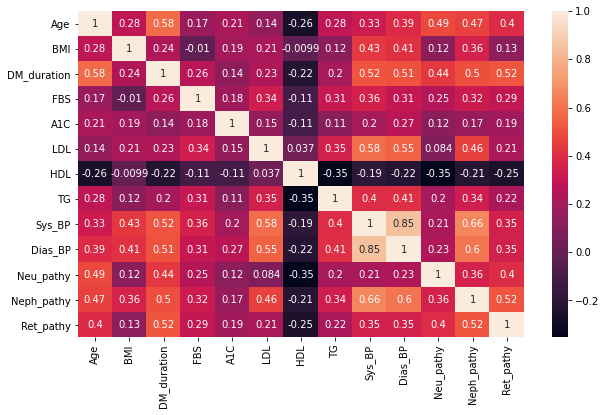

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# Correlation matrix
cor = diabetes_data.corr()

# Plotting Heatmap
plt.figure(figsize = (10,6))
sns.heatmap(cor,annot = True)

**Note that :** Most correlation coefficient are less than 0.50. Hence, we cannot use this method to determine the required features for our model.

<br>Therefore, we will use **Backward elimination** (aka backward deletion) method that enters all the features into the model equation at once and then eliminates/deletes them one-by-one based on their contribbution to the regression model which is measured using p-value significance.


#### **1.** Neuropathy prediction model

**Step 1:**  
***Feature Selection*** : Using Backward elimination method

Steps :

1.1. Select a significance level, say 5% (0.05)

1.2. Fit a model with all features (variables)

1.3. Consider the feature with the highest P-Value. If its P-value is greater than significance level (P > SL), go to step 1.4. Else, the model is ready.

1.4. Eliminate this feature (variable).

1.5. Fit a model with the new set of features, and go to step 1.3.

**Step 2:**   
***Regression model***  : We are going to use a **Logistic Regression model** since the outcome variable Neu_pathy is dichotomous (*binary*) i.e., takes values either 0 (*no*) or 1 (*yes*). 

In [ ]:
#importing libraries
import matplotlib
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#Feature Matrix
X = diabetes_data[['Age', 'BMI', 'DM_duration', 'FBS', 'A1C', 'LDL', 'TG', 'Sys_BP','Dias_BP']]   
#Target Variable
y = diabetes_data["Neu_pathy"]          

#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X)
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.pvalues

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


const          0.467641
Age            0.000967
BMI            0.946482
DM_duration    0.020545
FBS            0.085112
A1C            0.916781
LDL            0.624686
TG             0.476795
Sys_BP         0.680633
Dias_BP        0.905211
dtype: float64

In [ ]:
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.10):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['Age', 'DM_duration', 'FBS']


In [ ]:
X_1

,const,Age,DM_duration,FBS
0,1.0,65.0,20.0,129.0
1,1.0,42.0,3.0,210.0
2,1.0,31.0,11.0,164.0
3,1.0,70.0,29.0,208.0
4,1.0,54.0,6.0,183.0
...,...,...,...,...
128,1.0,52.0,3.0,138.0
129,1.0,56.0,3.0,156.0
130,1.0,65.0,3.0,300.0
131,1.0,56.0,5.0,213.0


In [ ]:
# Fitting Logistic Regression to the opt Training set
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_1,y, test_size = 0.3, random_state = 0)
Neuropathy = LogisticRegression(random_state = 0)
Neuropathy.fit(X_train, y_train)

# predicting the test set result
y_pred_logreg = Neuropathy.predict(X_test)

y_pred_logreg

array([1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0])

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
cm_logreg

array([[13,  5],
       [ 5, 17]])

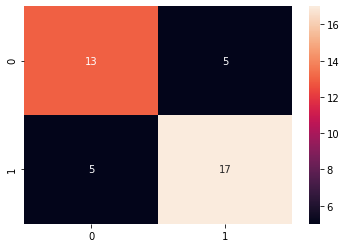

In [ ]:
#Let's visualize the confusion matrix with heatmap
import seaborn as sns
sns.heatmap(cm_logreg, annot=True)

In [ ]:
#####from confusion matrix calculate accuracy
tn,fp,fn,tp = confusion_matrix(y_test, y_pred_logreg).ravel()
accuracy=(tp+tn)/(tn+fp+fn+tp)
print ('Accuracy : ', accuracy)

sensitivity = tp/(fn+tp)
print('Sensitivity : %.3f'% sensitivity )

specificity = tn/(tn+fp)
print('Specificity : %.3f'% specificity)

Accuracy :  0.75
Sensitivity : 0.773
Specificity : 0.722


###ROC Curve

#####Response - Neuropathy
#####Predictors - Age, DM Duration, FBS

Logistic: ROC AUC=0.788


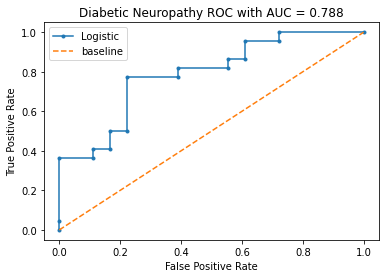

In [ ]:
# roc curve and auc
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# predict probabilities
lr_probs = Neuropathy.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curve
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# plot baseline
pyplot.plot(np.linspace(0,1,200),np.linspace(0,1,200),label='baseline',linestyle='--')
# axis labels and title
pyplot.title("Diabetic Neuropathy ROC with AUC = %.3f" % (lr_auc))
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

####**Conclusion :** 
1. We observe that 0.5 < AUC = 0.788 < 1 implies that there is a high chance that our classifier is able to distinguish the positive class values from the negative class values. 
2. This is so because the classifier is able to detect more numbers of True positives and True negatives than False negatives and False positives. 
3. Therefore, we may say that our model/classifier has high sensitivity i.e., few false negatives and thus fewer cases of Neuropathy are missed.

#### **2.** Nephropathy prediction model

Similar procedure as predicting Neuropathy.

In [ ]:
#importing libraries
import matplotlib
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#Feature matrix
X = diabetes_data[['Age', 'BMI', 'DM_duration', 'FBS', 'A1C', 'LDL', 'TG', 'Sys_BP','Dias_BP']]   
#Target Variable
y = diabetes_data["Neph_pathy"]          

#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X)
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.pvalues

const          3.793110e-10
Age            5.472565e-03
BMI            2.708526e-01
DM_duration    2.620796e-01
FBS            3.049617e-01
A1C            6.846971e-01
LDL            9.289963e-02
TG             8.312237e-01
Sys_BP         2.751244e-03
Dias_BP        9.994647e-01
dtype: float64

In [ ]:
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.10):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['Age', 'LDL', 'Sys_BP']


In [ ]:
# Fitting Logistic Regression to the opt Training set
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_1,y, test_size = 0.3, random_state = 0)
Nephropathy = LogisticRegression(random_state = 0)
Nephropathy.fit(X_train, y_train)

# predicting the test set result
y_pred_logreg = Nephropathy.predict(X_test)

y_pred_logreg

array([1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1])

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
cm_logreg

array([[18,  1],
       [ 5, 16]])

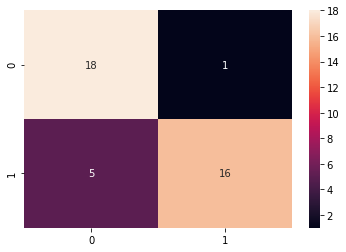

In [ ]:
#Let's visualize the confusion matrix with heatmap
import seaborn as sns
sns.heatmap(cm_logreg, annot=True)

In [ ]:
#####from confusion matrix calculate accuracy
tn,fp,fn,tp = confusion_matrix(y_test, y_pred_logreg).ravel()
accuracy=(tp+tn)/(tn+fp+fn+tp)
print ('Accuracy : ', accuracy)

sensitivity = tp/(fn+tp)
print('Sensitivity : %.3f'% sensitivity )

specificity = tn/(tn+fp)
print('Specificity : %.3f'% specificity)

Accuracy :  0.85
Sensitivity : 0.762
Specificity : 0.947


###ROC Curve

#####Response - Nephropathy
#####Predictors - Age, LDL, Sys_BP

Logistic: ROC AUC=0.865


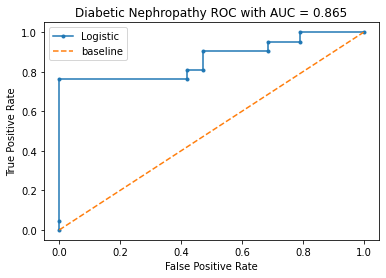

In [ ]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# predict probabilities
lr_probs = Nephropathy.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curve
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# plot baseline
pyplot.plot(np.linspace(0,1,200),np.linspace(0,1,200),label='baseline',linestyle='--')
# axis labels and title
pyplot.title("Diabetic Nephropathy ROC with AUC = %.3f" % (lr_auc))
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

####**Conclusion :** 
1. We observe that 0.5 < AUC = 0.865 < 1 implies that there is a high chance that our classifier is able to distinguish the positive class values from the negative class values. 
2. This is so because the classifier is able to detect more numbers of True positives and True negatives than False negatives and False positives. 
3. Therefore, we may say that our model/classifier has high sensitivity i.e., few false negatives and thus fewer cases of Neuropathy are missed.

#### **3.** Retinopathy prediction model

Similar procedure as predicting Neuropathy.

In [ ]:
#importing libraries
import matplotlib
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#Feature Matrix
X = diabetes_data[['Age', 'BMI', 'DM_duration', 'FBS', 'A1C', 'LDL', 'TG', 'Sys_BP','Dias_BP']]   
#Target Variable
y = diabetes_data["Ret_pathy"]          

#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X)
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.pvalues

const          0.125193
Age            0.220283
BMI            0.704634
DM_duration    0.000306
FBS            0.142111
A1C            0.339711
LDL            0.807409
TG             0.687983
Sys_BP         0.870420
Dias_BP        0.902523
dtype: float64

In [ ]:
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.10):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['DM_duration', 'FBS']


In [ ]:
# Fitting Logistic Regression to the opt Training set
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_1,y, test_size = 0.3, random_state = 0)
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# predicting the test set result
y_pred_logreg = classifier.predict(X_test)

y_pred_logreg

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0])

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
cm_logreg

array([[20,  7],
       [ 8,  5]])

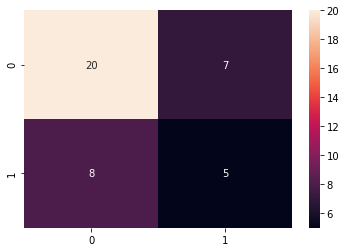

In [ ]:
#Let's visualize the confusion matrix with heatmap
import seaborn as sns
sns.heatmap(cm_logreg, annot=True)

In [ ]:
#####from confusion matrix calculate accuracy
tn,fp,fn,tp = confusion_matrix(y_test, y_pred_logreg).ravel()
accuracy=(tp+tn)/(tn+fp+fn+tp)
print ('Accuracy : ', accuracy)

sensitivity = tp/(fn+tp)
print('Sensitivity : %.3f'% sensitivity )

specificity = tn/(tn+fp)
print('Specificity : %.3f'% specificity)

Accuracy :  0.625
Sensitivity : 0.385
Specificity : 0.741


###ROC Curve

#####Response - Nephropathy
#####Predictors - DM_duration, FBS

Logistic: ROC AUC=0.632


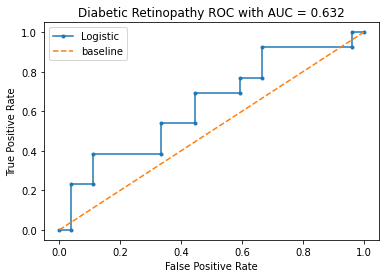

In [ ]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# predict probabilities
lr_probs = classifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curve
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# plot baseline
pyplot.plot(np.linspace(0,1,200),np.linspace(0,1,200),label='baseline',linestyle='--')
# axis labels and title
pyplot.title("Diabetic Retinopathy ROC with AUC = %.3f" % (lr_auc))
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

####**Conclusion :** 
1. We observe that 0.5 < AUC = 0.632 ~ 0.6 < 0.7 implies that our classifier has poor discrimminating capability. 
2. This is so because the classifier is able to detect more numbers of True positives and True negatives than False negatives and False positives. 
3. Therefore, we may say that our model/classifier has high sensitivity i.e., few false negatives and thus fewer cases of Neuropathy are missed.
4. This may have happened due to the following reasons :


> (i) non-normal data - 
      
  **Mitigation** - use some transformation like log or box-cox to make the predictors normal


> (ii) underfitting - occurs when the model is not able to obtain a sufficiently low error value on training set. On the other hand, overfitting, occurs when the gap between training error and test error is too large.

  **Mitigation** - 
*   Increase the size or number of parameters in the ML model.
*   Increase the complexity or type of the model.
*   Increasing the training time until cost function in ML is minimised.


> (ii) wrong feature selection - 
       
  **Mitigation** - use Embedded methods are iterative in a sense that takes care of each iteration of the model training process and carefully extract those features which contribute the most to the training for a particular iteration. Regularization methods (for example, Lasso) are the most commonly used embedded methods which penalize a feature given a coefficient threshold. If the feature is irrelevant, lasso penalizes it’s coefficient and make it 0. Hence the features with coefficient = 0 are removed and the rest are taken.
